# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [1]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [5]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
ys = [g(item) for item in xs] # targets

ts = [f(item) for item in xs] # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

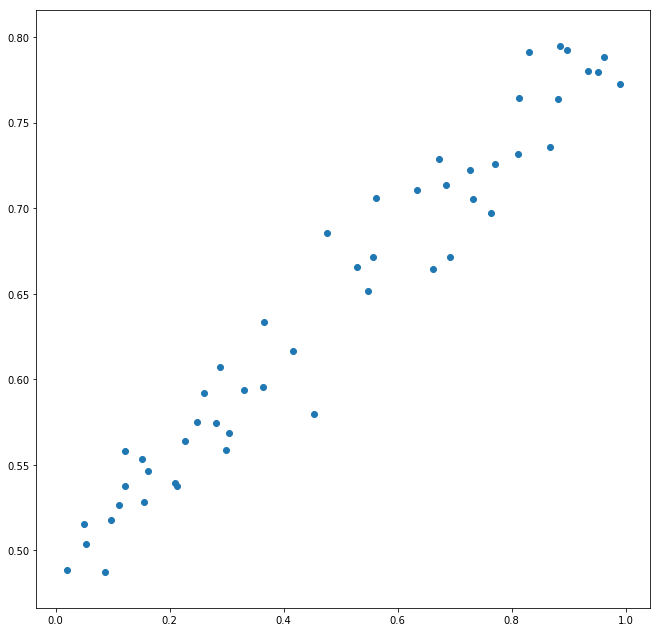

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [21]:
import math
def l2_loss(ys, ps):
    return math.sqrt(sum((y - x) ** 2 for x, y in zip(ys, ps)) / n)

Please take a while to (roughly) guess the output before executing the cell below.

In [22]:
l2_loss(ys, ts)

0.02179683532223106

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [25]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

for i in range(n_epochs):
    der_a = sum(2 * x * (a * x + b - y) for x, y in zip(xs, ys)) / n
    der_b = sum(2 * (a * x + b - y) for x, y in zip(xs, ys)) / n
    a = a - lr * der_a
    b = b - lr * der_b
    
    loss = evaluate(a, b)
    losses.append(loss)
    
    print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b))

Iter:   0 Loss: 0.16577019 a:  0.33904, b:  0.64224
Iter:   1 Loss: 0.04793066 a:  0.25705, b:  0.47805
Iter:   2 Loss: 0.02594953 a:  0.28118, b:  0.51775
Iter:   3 Loss: 0.02357128 a:  0.27826, b:  0.50607
Iter:   4 Loss: 0.02315031 a:  0.28194, b:  0.50749
Iter:   5 Loss: 0.02289569 a:  0.28374, b:  0.50570
Iter:   6 Loss: 0.02268136 a:  0.28582, b:  0.50483
Iter:   7 Loss: 0.02249552 a:  0.28765, b:  0.50382
Iter:   8 Loss: 0.02233419 a:  0.28937, b:  0.50294
Iter:   9 Loss: 0.02219425 a:  0.29096, b:  0.50210
Iter:  10 Loss: 0.02207296 a:  0.29244, b:  0.50133
Iter:  11 Loss: 0.02196791 a:  0.29381, b:  0.50062
Iter:  12 Loss: 0.02187700 a:  0.29509, b:  0.49995
Iter:  13 Loss: 0.02179836 a:  0.29627, b:  0.49933
Iter:  14 Loss: 0.02173038 a:  0.29737, b:  0.49876
Iter:  15 Loss: 0.02167163 a:  0.29839, b:  0.49823
Iter:  16 Loss: 0.02162089 a:  0.29934, b:  0.49773
Iter:  17 Loss: 0.02157707 a:  0.30021, b:  0.49728
Iter:  18 Loss: 0.02153924 a:  0.30103, b:  0.49685
Iter:  19 Lo

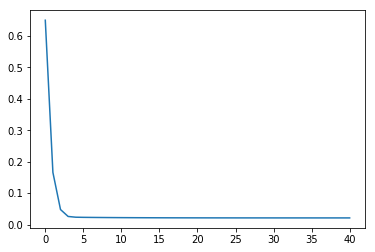

In [26]:
plt.plot(losses)

Let's now visually asses our predictions on training data

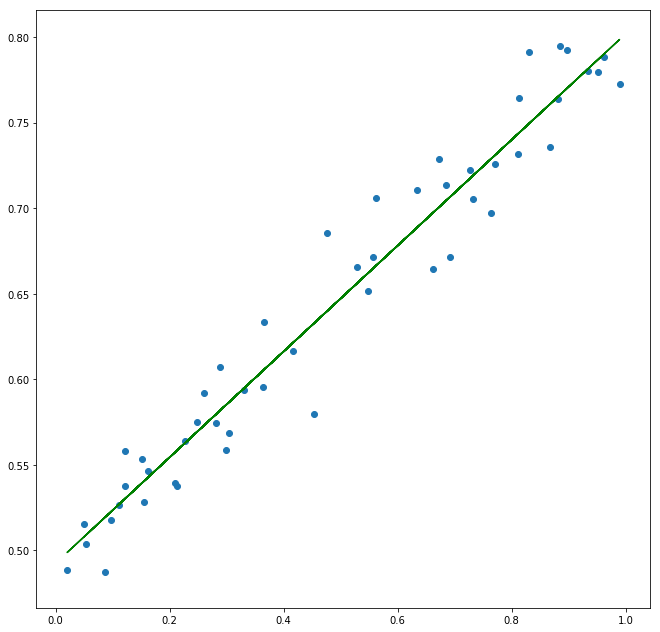

In [27]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

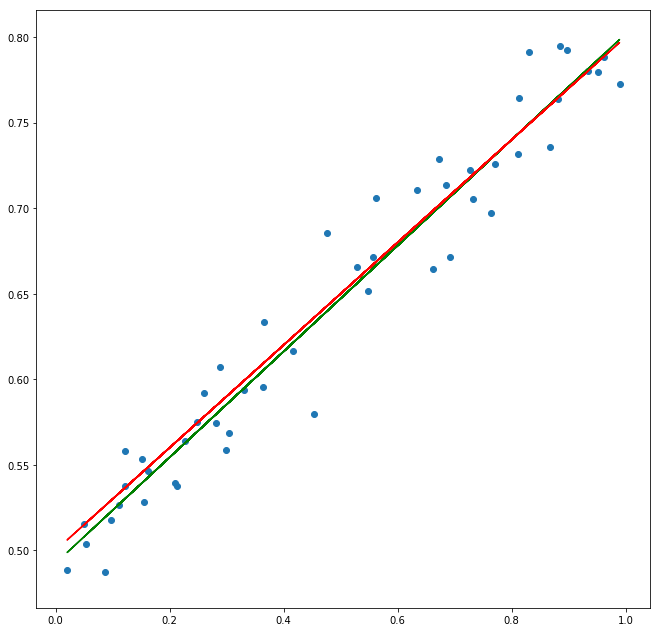

In [28]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')

plt.plot(xs, ts, c='r')

plt.show()

Let's check our implementation vs. the one in sklearn

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # training

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(sk_loss, sk_a, sk_b))

Loss: 0.02130219 a:  0.31158, b:  0.49135


Using the code above, implement and test the following approaches:
* random search instead of gradient descent,
* stochastic gradient descent (i.e. changing the parameters after each instance),
* learning rate adaptation according to your own heuristic.